In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [ ]:
df = pd.read_csv("/content/water-quality-cleaned.csv")

In [ ]:
#MLR analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [ ]:
target = 'Temperature'
predictors = [
    'pH', 'DO', 'Conductivity',
    'Total_N', 'Total_P']


In [ ]:
X = sm.add_constant(df[predictors])
y = df[target]
mlr = sm.OLS(y, X).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     9225.
Date:                Sun, 30 Nov 2025   Prob (F-statistic):               0.00
Time:                        13:21:11   Log-Likelihood:            -1.8440e+05
No. Observations:              144056   AIC:                         3.688e+05
Df Residuals:                  144050   BIC:                         3.689e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.719e-17      0.002   1.62e-14   

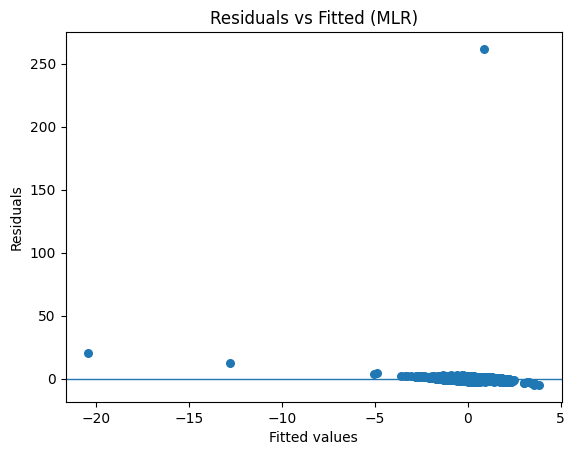

In [ ]:
#residuals
fitted = mlr.fittedvalues
resid = mlr.resid

plt.figure()
plt.scatter(fitted, resid, s=30)
plt.axhline(0, linewidth=1)
plt.xlabel("Fitted values"); plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (MLR)"); plt.show()

In [ ]:
df["WQI"] = (
    df['pH'] * .17 +
    df['DO'] * .26 +
    df['Conductivity'] * .11 +
    df['Temperature'] * .15 +
    df['Total_N'] * .15 +
    df['Total_P'] * .15
)

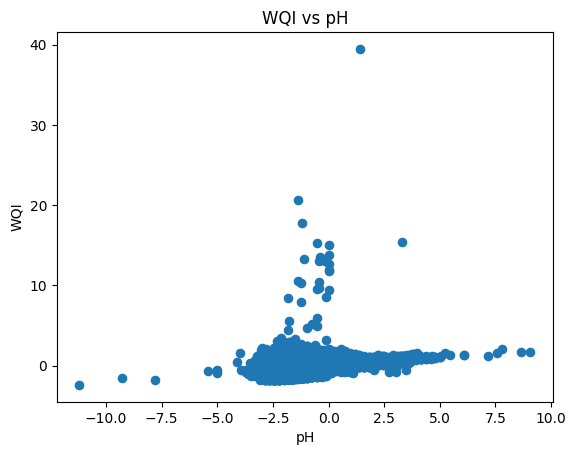

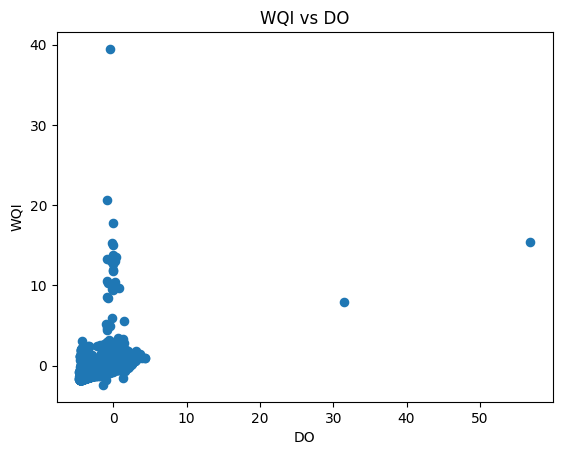

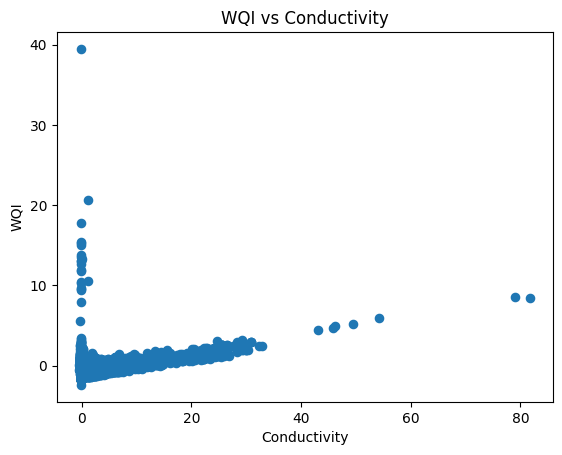

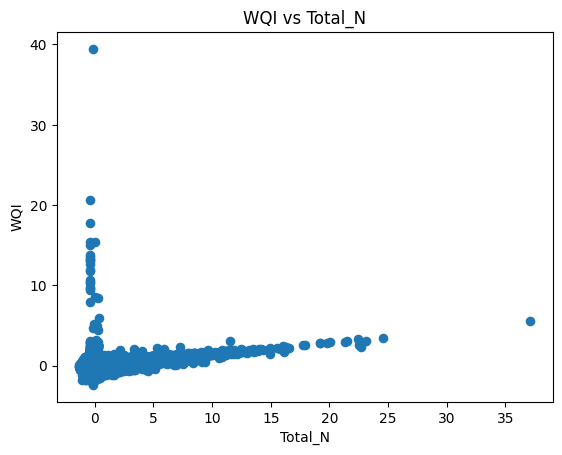

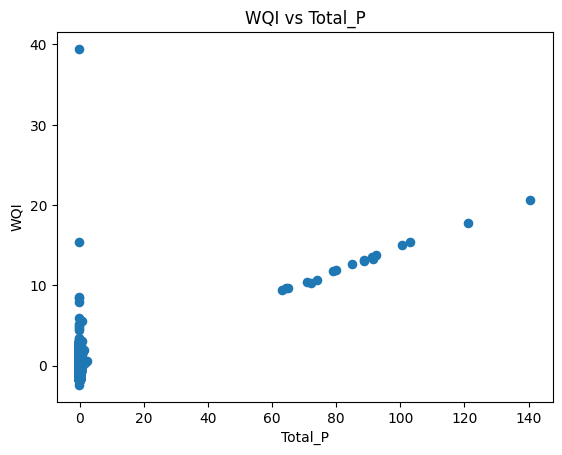

In [ ]:
target = "WQI"
predictors = ["pH", "DO", "Conductivity", "Total_N", "Total_P"]

for col in predictors:
    plt.figure()
    plt.scatter(df[col], df[target], s=35)
    plt.xlabel(col); plt.ylabel(target)
    plt.title(f"{target} vs {col}")
    plt.show()


In [ ]:
X = sm.add_constant(df[predictors])
y = df[target]
mlr = sm.OLS(y, X).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                    WQI   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 3.246e+05
Date:                Sun, 30 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:23:26   Log-Likelihood:                 88894.
No. Observations:              144056   AIC:                        -1.778e+05
Df Residuals:                  144050   BIC:                        -1.777e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.413e-17      0.000  -1.28e-13   

In [ ]:
b = mlr.params
print("Fitted MLR equation:")
print(f"{target} = "
       f"{b['const']:.3f} + "
       #f"{b['Temperature']:.3f}*Temperature + "
       f"{b['Total_N']:.3f}*Total_N + "
       f"{b['pH']:.3f}*pH + "
       f"{b['DO']:.3f}*DO + "
       f"{b['Total_P']:.3f}*Total_P"
       f"{b['Conductivity']:.3f}*Conductivity")

Fitted MLR equation:
WQI = -0.000 + 0.141*Total_N + 0.243*pH + 0.202*DO + 0.150*Total_P0.114*Conductivity


In [ ]:
coef_table = pd.DataFrame({
     "term": mlr.params.index,
     "estimate": mlr.params.values,
     "std_error": mlr.bse.values,
     "t_value": mlr.tvalues.values,
     "p_value": mlr.pvalues.values
 })
coef_table

,term,estimate,std_error,t_value,p_value
0,const,-4.412703e-17,0.000344,-1.282898e-13,1.0
1,pH,2.430764e-01,0.000387,6.281656e+02,0.0
2,DO,2.018934e-01,0.000396,5.101771e+02,0.0
3,Conductivity,1.137867e-01,0.000348,3.272393e+02,0.0
4,Total_N,1.414332e-01,0.000357,3.967169e+02,0.0
5,Total_P,1.499599e-01,0.000344,4.359617e+02,0.0


In [ ]:
X_base = sm.add_constant(df[["Temperature", "Total_N"]])
base = sm.OLS(y, X_base).fit()

print(base.summary())

                            OLS Regression Results                            
Dep. Variable:                    WQI   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                 2.488e+04
Date:                Sun, 30 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:23:41   Log-Likelihood:                -70297.
No. Observations:              144056   AIC:                         1.406e+05
Df Residuals:                  144053   BIC:                         1.406e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.505e-18      0.001  -6.26e-15      

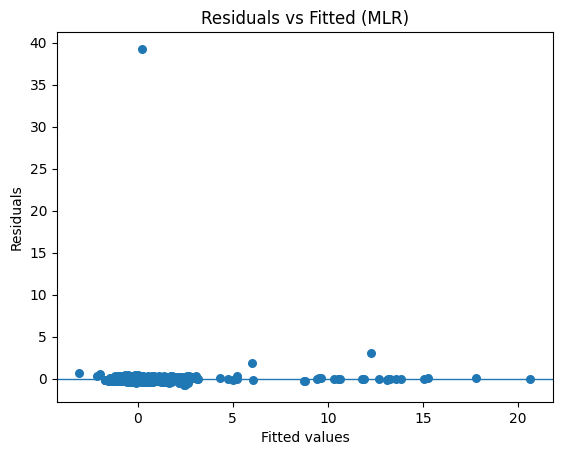

In [ ]:
fitted = mlr.fittedvalues
resid = mlr.resid

plt.figure()
plt.scatter(fitted, resid, s=30)
plt.axhline(0, linewidth=1)
plt.xlabel("Fitted values"); plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (MLR)"); plt.show()